### K-Nearest Neighbours


In this project we will load customer data set , fit data and use K-nearest Neighbours to predict a data point


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Visualization and Analysis


In [7]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

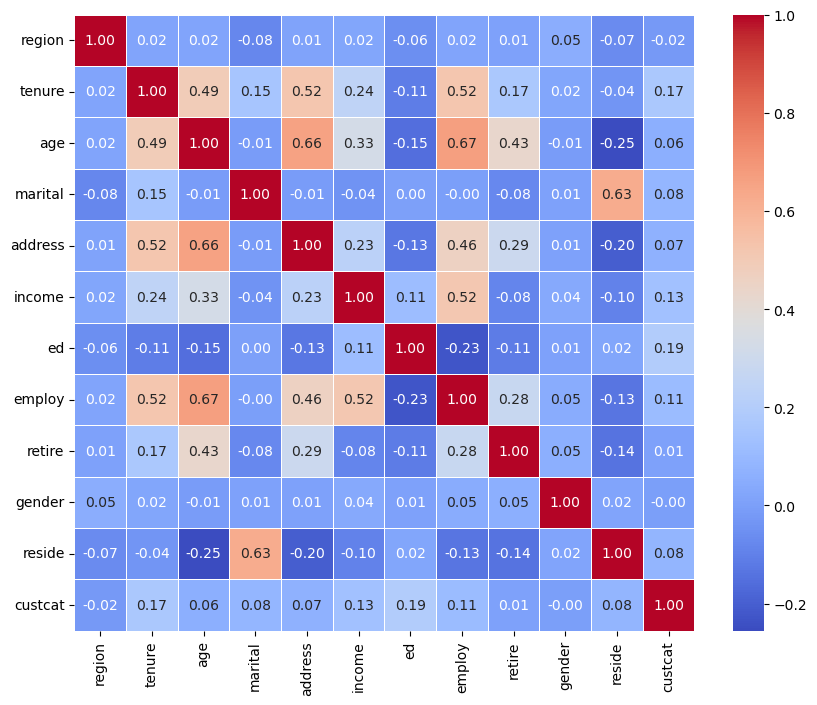

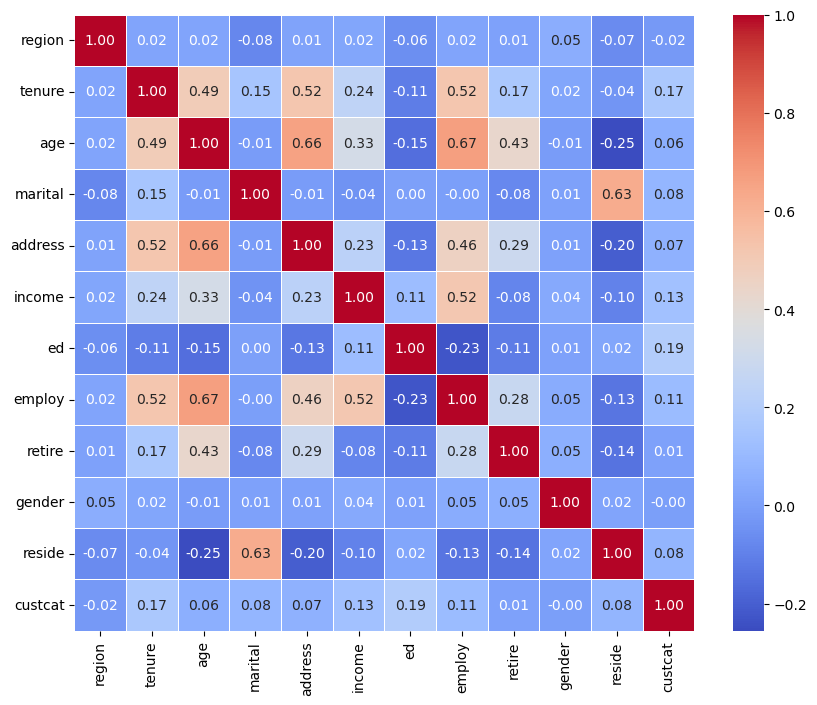

In [9]:
#visualize the correlation map of the data set to determine how the different features are related to each other.
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

As is visible from the correlation map, some features have beeter correlation among them than others, basically indicating the depth of relationship between the two features. What is of interest to us is the correlation of the target feature, i.e. custcat with all the other features. This will help us identify which features should be focussed on for modeling and which ones can be ignored.

In [10]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

This shows us that the features retire and gender have the least effect on custcat while ed and tenure have the most effect.

### Separate the input and the target features


In [11]:
X= df.drop('custcat',axis=1)
y=df['custcat']

### Data Normalization

In [12]:
X_norm=StandardScaler().fit_transform(X)

### Train Test Split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.2,random_state=4)


### Taining 

In [19]:
X_tain,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.2,random_state=4)
k = 3
#Train Model and Predict  
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)
#predicting 
yhat = knn_model.predict(X_test)

In [20]:
#predicting 
yhat = knn_model.predict(X_test)

In [21]:
# accuracy evaluation
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.315


In [ ]:
# lets build a model with K=6

In [22]:
k = 6
knn_model_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = knn_model_6.predict(X_test)
print("Test set Accuracy: ", accuracy_score(y_test, yhat6))

Test set Accuracy:  0.31


### Chosing the correct value of K


In [23]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

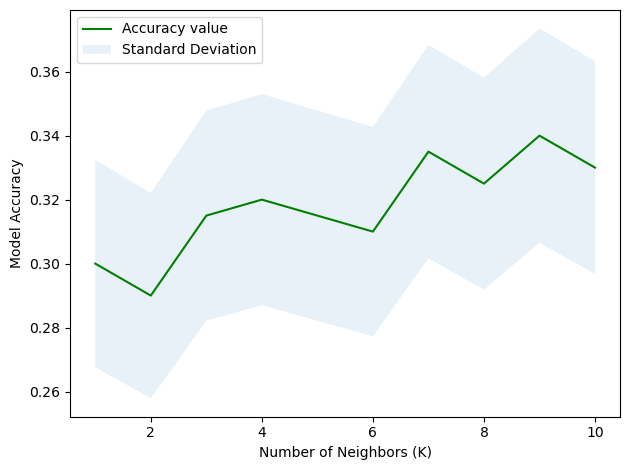

In [24]:
#Plot the model accuracy for a different number of neighbors.
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [25]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1)

The best accuracy was with 0.34 with k = 9
